In [1]:
import os
import psycopg2
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'


In [2]:
# Load environment variables from .env file
load_dotenv()

# Retrieve environment variables
host = os.getenv("HOST")
port = os.getenv("PORT")
database = os.getenv("DATABASE")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASS")

# Construct the connection string
connection_string = f"host={host} port={port} dbname={database} user={user} password={password}"

In [3]:
# Connect to the PostgreSQL database
try:
    connection = psycopg2.connect(connection_string)
    cursor = connection.cursor()
    print("Connected to the PostgreSQL database!")

    # Execute queries
    query = "SELECT * FROM cons_by_district;"
    cursor.execute(query)
    raw_data = cursor.fetchall()

    # Don't forget to close the cursor and connection when done
    cursor.close()
    connection.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)

Connected to the PostgreSQL database!


In [4]:
# Convert fetched data into df
column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(raw_data, columns=column_names)
df = df.sort_values(by=['id','YYMM'])
df

id province_code  province_name amphur_code  amphur_name  \
10521      1            10  กรุงเทพมหานคร          01       พระนคร   
3          2            10  กรุงเทพมหานคร          01       พระนคร   
4          3            10  กรุงเทพมหานคร          01       พระนคร   
5          4            10  กรุงเทพมหานคร          01       พระนคร   
6          5            10  กรุงเทพมหานคร          01       พระนคร   
...      ...           ...            ...         ...          ...   
10516  10761            10  กรุงเทพมหานคร          20   บางกอกน้อย   
10517  10762            10  กรุงเทพมหานคร          21  บางขุนเทียน   
10518  10763            10  กรุงเทพมหานคร          32       ประเวศ   
10519  10764            10  กรุงเทพมหานคร          35       จอมทอง   
10520  10765            10  กรุงเทพมหานคร          40        บางแค   

      class_group_code class_group_name  consumption       YYMM status  
10521                2         BUSINESS       249666 2022-01-01      1  
3                    3         INDUSTRY         7204 2022-01-01      1  
4                    4        ENTERTAIN        38717 2022-01-01      1  
5                    5       GOVERNMENT        47321 2022-01-01      1  
6                    6      INSTITUTION         4709 2022-01-01      1  
...                ...              ...          ...        ...    ...  
10516                4        ENTERTAIN        62583 2021-10-01      1  
10517                8              MWA          222 2021-10-01      1  
10518                2         BUSINESS       513405 2021-10-01      1  
10519                7        CONSTRUCT        21439 2021-10-01      1  
10520                4        ENTERTAIN        64320 2021-10-01      1  

[10765 rows x 10 columns]

In [5]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df

id province_code  province_name amphur_code  amphur_name  \
10521      1            10  กรุงเทพมหานคร          01       พระนคร   
3          2            10  กรุงเทพมหานคร          01       พระนคร   
4          3            10  กรุงเทพมหานคร          01       พระนคร   
5          4            10  กรุงเทพมหานคร          01       พระนคร   
6          5            10  กรุงเทพมหานคร          01       พระนคร   
...      ...           ...            ...         ...          ...   
10516  10761            10  กรุงเทพมหานคร          20   บางกอกน้อย   
10517  10762            10  กรุงเทพมหานคร          21  บางขุนเทียน   
10518  10763            10  กรุงเทพมหานคร          32       ประเวศ   
10519  10764            10  กรุงเทพมหานคร          35       จอมทอง   
10520  10765            10  กรุงเทพมหานคร          40        บางแค   

      class_group_code class_group_name  consumption       YYMM status  
10521                2         BUSINESS       249666 2022-01-01      1  
3                    3         INDUSTRY         7204 2022-01-01      1  
4                    4        ENTERTAIN        38717 2022-01-01      1  
5                    5       GOVERNMENT        47321 2022-01-01      1  
6                    6      INSTITUTION         4709 2022-01-01      1  
...                ...              ...          ...        ...    ...  
10516                4        ENTERTAIN        62583 2021-10-01      1  
10517                8              MWA          222 2021-10-01      1  
10518                2         BUSINESS       513405 2021-10-01      1  
10519                7        CONSTRUCT        21439 2021-10-01      1  
10520                4        ENTERTAIN        64320 2021-10-01      1  

[10765 rows x 10 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10765 entries, 10521 to 10520
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10765 non-null  int64         
 1   province_code     10581 non-null  object        
 2   province_name     10581 non-null  object        
 3   amphur_code       10581 non-null  object        
 4   amphur_name       10559 non-null  object        
 5   class_group_code  10765 non-null  object        
 6   class_group_name  10765 non-null  object        
 7   consumption       10765 non-null  int64         
 8   YYMM              10765 non-null  datetime64[ns]
 9   status            10765 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 925.1+ KB


In [7]:
df[df['province_code'].isna() | df['province_name'].isna() | df['amphur_code'].isna() | df['amphur_name'].isna()]

id province_code province_name amphur_code amphur_name  \
156      160           NaN           NaN         NaN         NaN   
268      270           NaN           NaN         NaN         NaN   
355      363            11   สมุทรปราการ         NaN         NaN   
356      409           NaN           NaN          34         NaN   
357      410           NaN           NaN         NaN         NaN   
...      ...           ...           ...         ...         ...   
10074  10312           NaN           NaN         NaN         NaN   
10217  10455            11   สมุทรปราการ         NaN         NaN   
10291  10538           NaN           NaN         NaN         NaN   
10436  10689           NaN           NaN         NaN         NaN   
10509  10753           NaN           NaN         NaN         NaN   

      class_group_code class_group_name  consumption       YYMM status  
156                  3         INDUSTRY         8265 2022-02-01      1  
268                  4        ENTERTAIN         4118 2022-02-01      1  
355                  1        RESIDENCE           45 2022-01-01      1  
356                  1        RESIDENCE          138 2022-01-01      1  
357                  1        RESIDENCE       433733 2022-01-01      1  
...                ...              ...          ...        ...    ...  
10074                4        ENTERTAIN        11810 2022-09-01      1  
10217                1        RESIDENCE           45 2022-11-01      1  
10291                8              MWA         3760 2022-12-01      1  
10436                5       GOVERNMENT      1775464 2021-11-01      1  
10509                5       GOVERNMENT      1725553 2021-10-01      1  

[206 rows x 10 columns]

In [8]:
cleaned_df = df.dropna(subset=['province_code','amphur_code'],how='any')
cleaned_df = cleaned_df.sort_values(by=['YYMM','province_code','amphur_code','id'])
cleaned_df

id province_code  province_name amphur_code amphur_name  \
5397   5533            10  กรุงเทพมหานคร          01      พระนคร   
5398   5534            10  กรุงเทพมหานคร          01      พระนคร   
5399   5535            10  กรุงเทพมหานคร          01      พระนคร   
10577  5536            10  กรุงเทพมหานคร          01      พระนคร   
10578  5580            10  กรุงเทพมหานคร          01      พระนคร   
...     ...           ...            ...         ...         ...   
9058   9230            13       ปทุมธานี          06     ลำลูกกา   
5309   5429            24     ฉะเชิงเทรา           4     บางปะกง   
5310   5430            24     ฉะเชิงเทรา           4     บางปะกง   
9019   9231            24     ฉะเชิงเทรา           4     บางปะกง   
5372   5431            73         นครปฐม          07    พุทธมณฑล   

      class_group_code class_group_name  consumption       YYMM status  
5397                 4        ENTERTAIN        33640 2021-10-01      1  
5398                 5       GOVERNMENT        46032 2021-10-01      1  
5399                 6      INSTITUTION         4042 2021-10-01      1  
10577                7        CONSTRUCT         3210 2021-10-01      1  
10578                2         BUSINESS       232488 2021-10-01      1  
...                ...              ...          ...        ...    ...  
9058                 2         BUSINESS         1909 2023-07-01      1  
5309                 1        RESIDENCE          937 2023-07-01      1  
5310                 2         BUSINESS           57 2023-07-01      1  
9019                 7        CONSTRUCT         8906 2023-07-01      1  
5372                 1        RESIDENCE          230 2023-07-01      1  

[10559 rows x 10 columns]

In [10]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10559 entries, 5397 to 5372
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10559 non-null  int64         
 1   province_code     10559 non-null  object        
 2   province_name     10559 non-null  object        
 3   amphur_code       10559 non-null  object        
 4   amphur_name       10559 non-null  object        
 5   class_group_code  10559 non-null  object        
 6   class_group_name  10559 non-null  object        
 7   consumption       10559 non-null  int64         
 8   YYMM              10559 non-null  datetime64[ns]
 9   status            10559 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 907.4+ KB


In [11]:
cleaned_df.describe()

id   consumption
count  10559.000000  1.055900e+04
mean    5384.557250  2.273641e+05
std     3108.749101  4.207141e+05
min        1.000000  0.000000e+00
25%     2692.500000  1.111150e+04
50%     5382.000000  4.424700e+04
75%     8068.500000  2.539620e+05
max    10765.000000  4.293764e+06

In [12]:
cleaned_df[cleaned_df['class_group_code'] == '1']

id province_code  province_name amphur_code amphur_name  \
8031    8213            10  กรุงเทพมหานคร          01      พระนคร   
10459  10705            10  กรุงเทพมหานคร          02       ดุสิต   
10466  10706            10  กรุงเทพมหานคร          03     หนองจอก   
10470  10708            10  กรุงเทพมหานคร          05      บางเขน   
10473  10709            10  กรุงเทพมหานคร          06     บางกะปิ   
...      ...           ...            ...         ...         ...   
5362    5419            12        นนทบุรี          06    ปากเกร็ด   
9016    9225            12        นนทบุรี           4   บางบัวทอง   
5368    5425            13       ปทุมธานี          06     ลำลูกกา   
5309    5429            24     ฉะเชิงเทรา           4     บางปะกง   
5372    5431            73         นครปฐม          07    พุทธมณฑล   

      class_group_code class_group_name  consumption       YYMM status  
8031                 1        RESIDENCE       164415 2021-10-01      1  
10459                1        RESIDENCE       377069 2021-10-01      1  
10466                1        RESIDENCE      1121186 2021-10-01      1  
10470                1        RESIDENCE      1322439 2021-10-01      1  
10473                1        RESIDENCE      1213654 2021-10-01      1  
...                ...              ...          ...        ...    ...  
5362                 1        RESIDENCE      2012161 2023-07-01      1  
9016                 1        RESIDENCE      2101903 2023-07-01      1  
5368                 1        RESIDENCE        30171 2023-07-01      1  
5309                 1        RESIDENCE          937 2023-07-01      1  
5372                 1        RESIDENCE          230 2023-07-01      1  

[1430 rows x 10 columns]

In [13]:
print(cleaned_df['class_group_code'].unique())
print(cleaned_df['class_group_name'].unique())

['4' '5' '6' '7' '2' '1' '3' '8']
['ENTERTAIN' 'GOVERNMENT' 'INSTITUTION' 'CONSTRUCT' 'BUSINESS' 'RESIDENCE'
 'INDUSTRY' 'MWA']


In [14]:
cleaned_df[cleaned_df['class_group_code'].isna() | cleaned_df['class_group_name'].isna()]

Empty DataFrame
Columns: [id, province_code, province_name, amphur_code, amphur_name, class_group_code, class_group_name, consumption, YYMM, status]
Index: []

In [15]:
print(cleaned_df['province_code'].value_counts())
print(cleaned_df['province_name'].value_counts())

10    8336
11    1013
12    1012
13     110
24      66
73      22
Name: province_code, dtype: int64
กรุงเทพมหานคร    8336
สมุทรปราการ      1013
นนทบุรี          1012
ปทุมธานี          110
ฉะเชิงเทรา         66
นครปฐม             22
Name: province_name, dtype: int64


In [16]:
print(cleaned_df['province_code'].value_counts())
print(cleaned_df['province_name'].value_counts())

10    8336
11    1013
12    1012
13     110
24      66
73      22
Name: province_code, dtype: int64
กรุงเทพมหานคร    8336
สมุทรปราการ      1013
นนทบุรี          1012
ปทุมธานี          110
ฉะเชิงเทรา         66
นครปฐม             22
Name: province_name, dtype: int64


In [17]:
print(cleaned_df['amphur_name'].value_counts())

จตุจักร        176
บางพลัด        176
บางซื่อ        176
บางกรวย        176
ประเวศ         176
              ... 
สัมพันธวงศ์    149
สายไหม         132
ลำลูกกา        110
บางปะกง         66
พุทธมณฑล        22
Name: amphur_name, Length: 65, dtype: int64


In [18]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects.patches:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

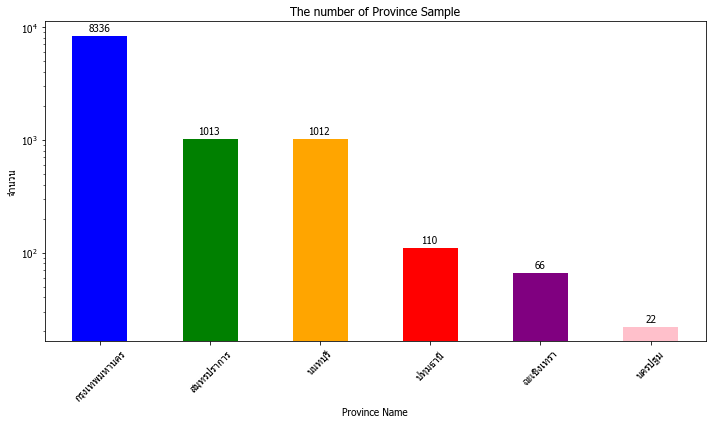

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
pv_name = cleaned_df['province_name'].unique()
pv_counts= cleaned_df['province_name'].value_counts()
bar_colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'cyan']
bars = pv_counts.plot(kind='bar',color=bar_colors)
autolabel(bars)
plt.title('The number of Province Sample')
plt.xlabel('Province Name')
plt.ylabel('จำนวน')
plt.xticks(rotation=45)
plt.yscale('log')
plt.tight_layout()

plt.show()

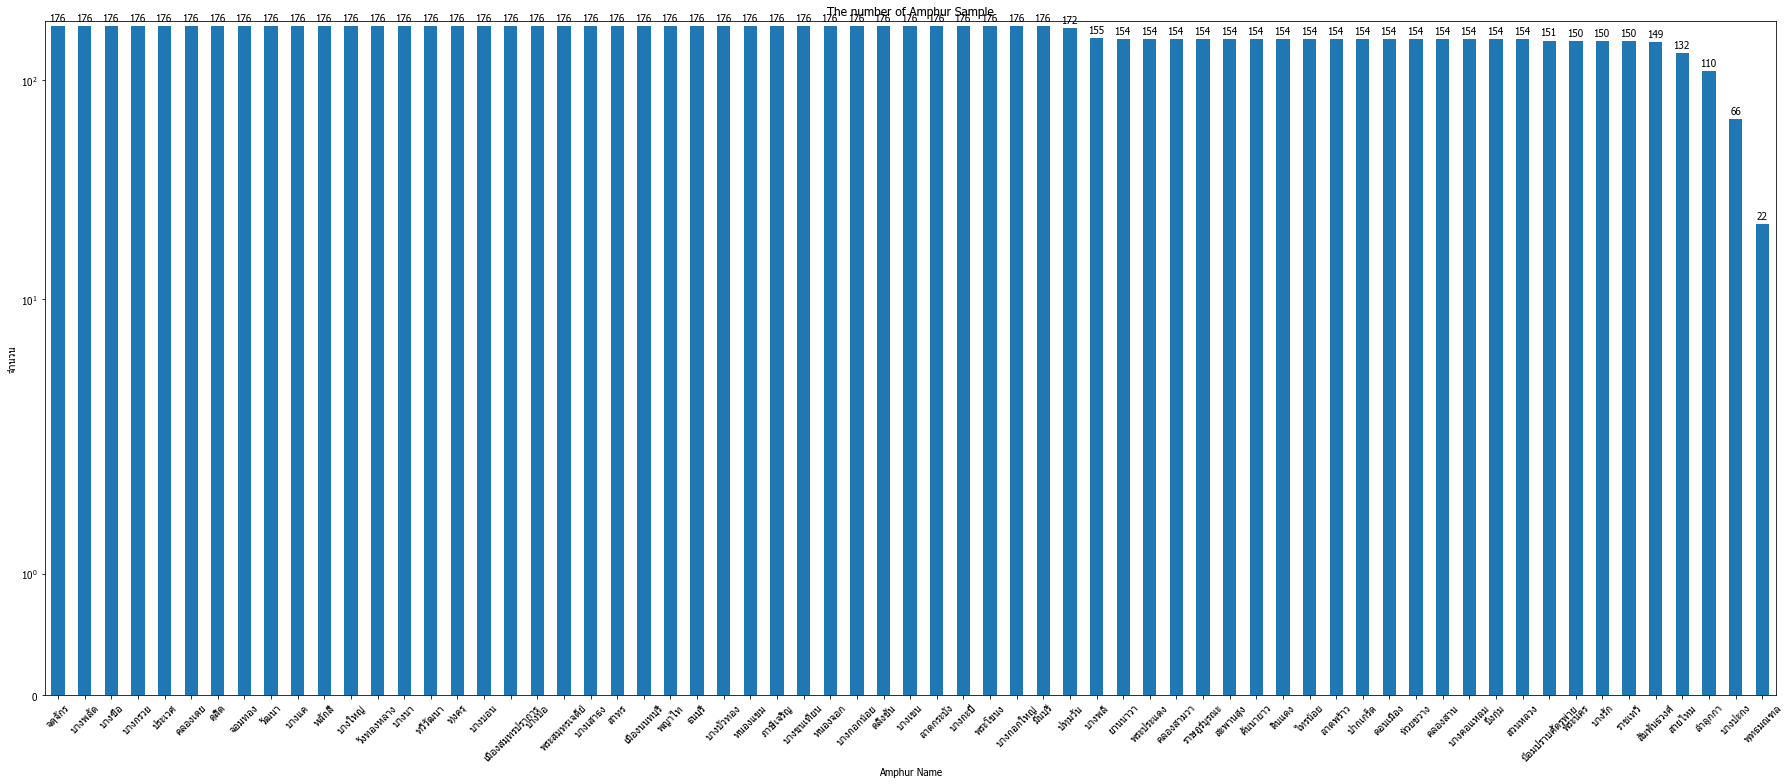

In [20]:
fig, ax = plt.subplots(figsize=(25, 11))
pv_name = cleaned_df['amphur_name'].unique()
pv_counts= cleaned_df['amphur_name'].value_counts()
# bar_colors = ['blue', 'green', 'orange', 'red', 'purple', 'pink', 'cyan']
bars = pv_counts.plot(kind='bar')
autolabel(bars)
plt.title('The number of Amphur Sample')
plt.xlabel('Amphur Name')
plt.ylabel('จำนวน')
plt.xticks(rotation=45)
plt.yscale('symlog')
plt.tight_layout()

plt.show()

In [21]:
cleaned_df['YYMM'] = pd.to_datetime(cleaned_df['YYMM'], format='%Y-%m-%d', errors='coerce')
# Filter out rows with NaT values (invalid dates)
cleaned_df = cleaned_df.dropna(subset=['YYMM'])
# Format the valid dates as 'mm/yy'
cleaned_df['YYMM'] = cleaned_df['YYMM'].dt.strftime("%m/%y")
cleaned_df

id province_code  province_name amphur_code amphur_name  \
5397   5533            10  กรุงเทพมหานคร          01      พระนคร   
5398   5534            10  กรุงเทพมหานคร          01      พระนคร   
5399   5535            10  กรุงเทพมหานคร          01      พระนคร   
10577  5536            10  กรุงเทพมหานคร          01      พระนคร   
10578  5580            10  กรุงเทพมหานคร          01      พระนคร   
...     ...           ...            ...         ...         ...   
9058   9230            13       ปทุมธานี          06     ลำลูกกา   
5309   5429            24     ฉะเชิงเทรา           4     บางปะกง   
5310   5430            24     ฉะเชิงเทรา           4     บางปะกง   
9019   9231            24     ฉะเชิงเทรา           4     บางปะกง   
5372   5431            73         นครปฐม          07    พุทธมณฑล   

      class_group_code class_group_name  consumption   YYMM status  
5397                 4        ENTERTAIN        33640  10/21      1  
5398                 5       GOVERNMENT        46032  10/21      1  
5399                 6      INSTITUTION         4042  10/21      1  
10577                7        CONSTRUCT         3210  10/21      1  
10578                2         BUSINESS       232488  10/21      1  
...                ...              ...          ...    ...    ...  
9058                 2         BUSINESS         1909  07/23      1  
5309                 1        RESIDENCE          937  07/23      1  
5310                 2         BUSINESS           57  07/23      1  
9019                 7        CONSTRUCT         8906  07/23      1  
5372                 1        RESIDENCE          230  07/23      1  

[10559 rows x 10 columns]

Province กรุงเทพมหานคร
   1 : พระนคร
0 0 ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
BUSINESS       22
RESIDENCE      22
INDUSTRY       18
Name: class_group_name, dtype: int64
   2 : ดุสิต
0 1 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
MWA            22
CONSTRUCT      22
RESIDENCE      22
Name: class_group_name, dtype: int64
   3 : หนองจอก
0 2 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
RESIDENCE      22
MWA            22
Name: class_group_name, dtype: int64
   4 : บางเขน
0 3 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
CONSTRUCT      22
MWA            22
RESIDENCE      22
INSTITUTION    22
Name: class_group_name, dtype: int64
   5 : บางกะปิ
1 0 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
RESIDENCE      22
MWA            22
Name: class_group_name, dtype: int64

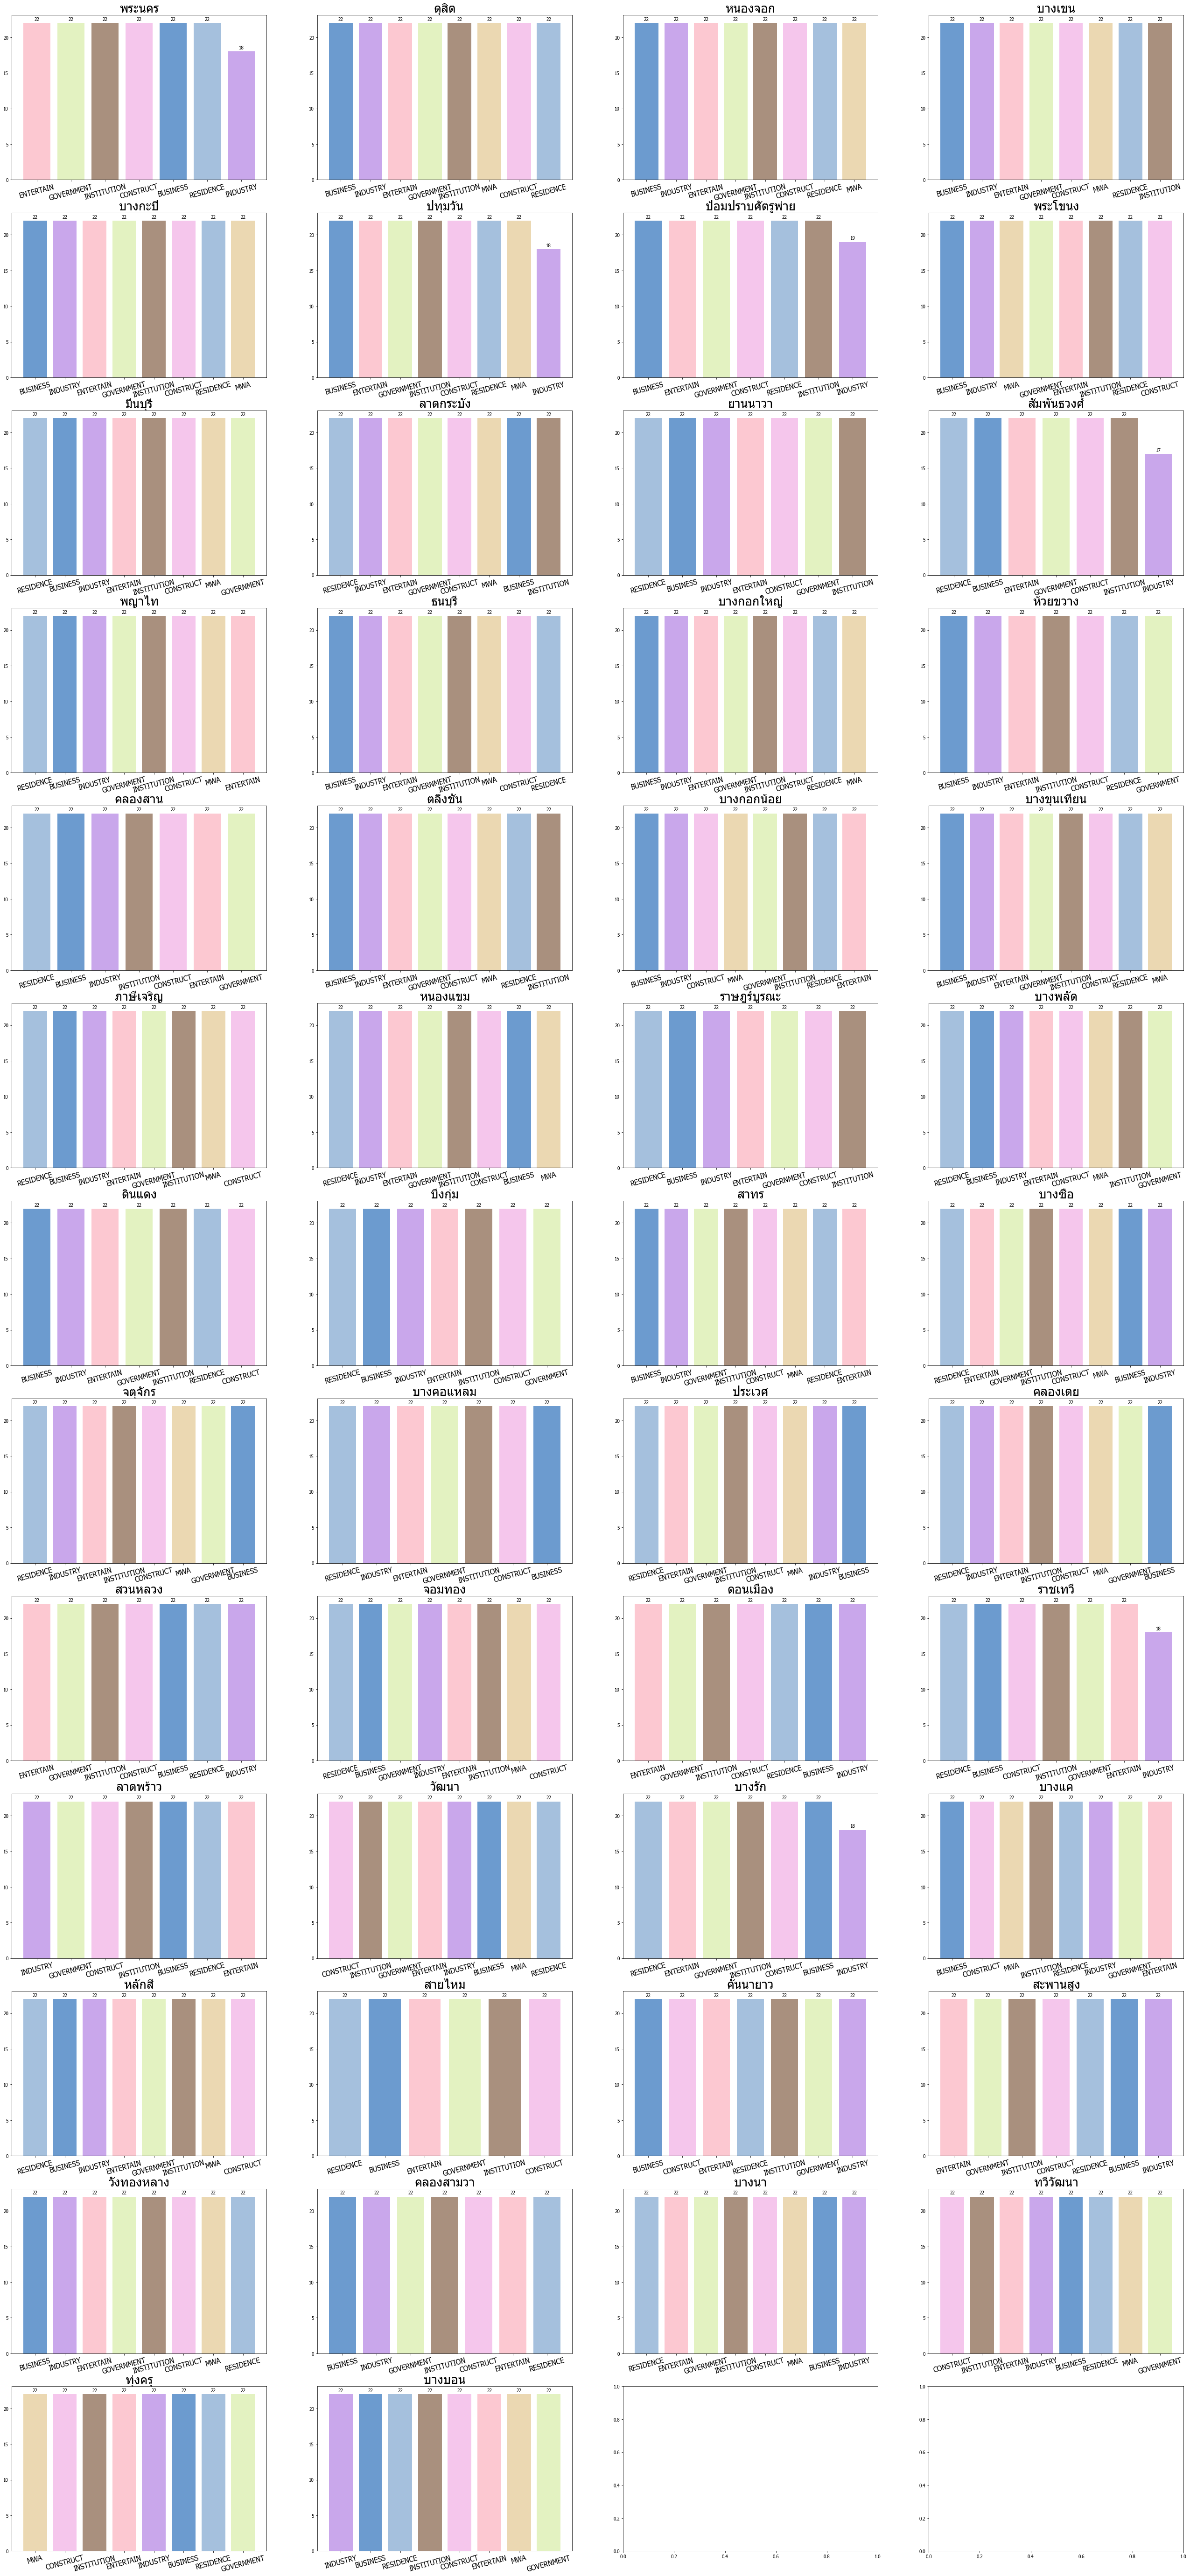

Province สมุทรปราการ
   1 : เมืองสมุทรปราการ
0 0 MWA            22
RESIDENCE      22
BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
INSTITUTION    22
CONSTRUCT      22
GOVERNMENT     22
Name: class_group_name, dtype: int64
   2 : บางบ่อ
0 1 RESIDENCE      22
BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
INSTITUTION    22
CONSTRUCT      22
MWA            22
GOVERNMENT     22
Name: class_group_name, dtype: int64
   3 : บางพลี
0 2 RESIDENCE      22
BUSINESS       22
INDUSTRY       22
INSTITUTION    22
CONSTRUCT      22
GOVERNMENT     22
ENTERTAIN      22
MWA             1
Name: class_group_name, dtype: int64
   4 : พระสมุทรเจดีย์
0 3 INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
BUSINESS       22
RESIDENCE      22
MWA            22
Name: class_group_name, dtype: int64
   5 : บางเสาธง
1 0 RESIDENCE      22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
MWA            22
BUSINESS       22
N

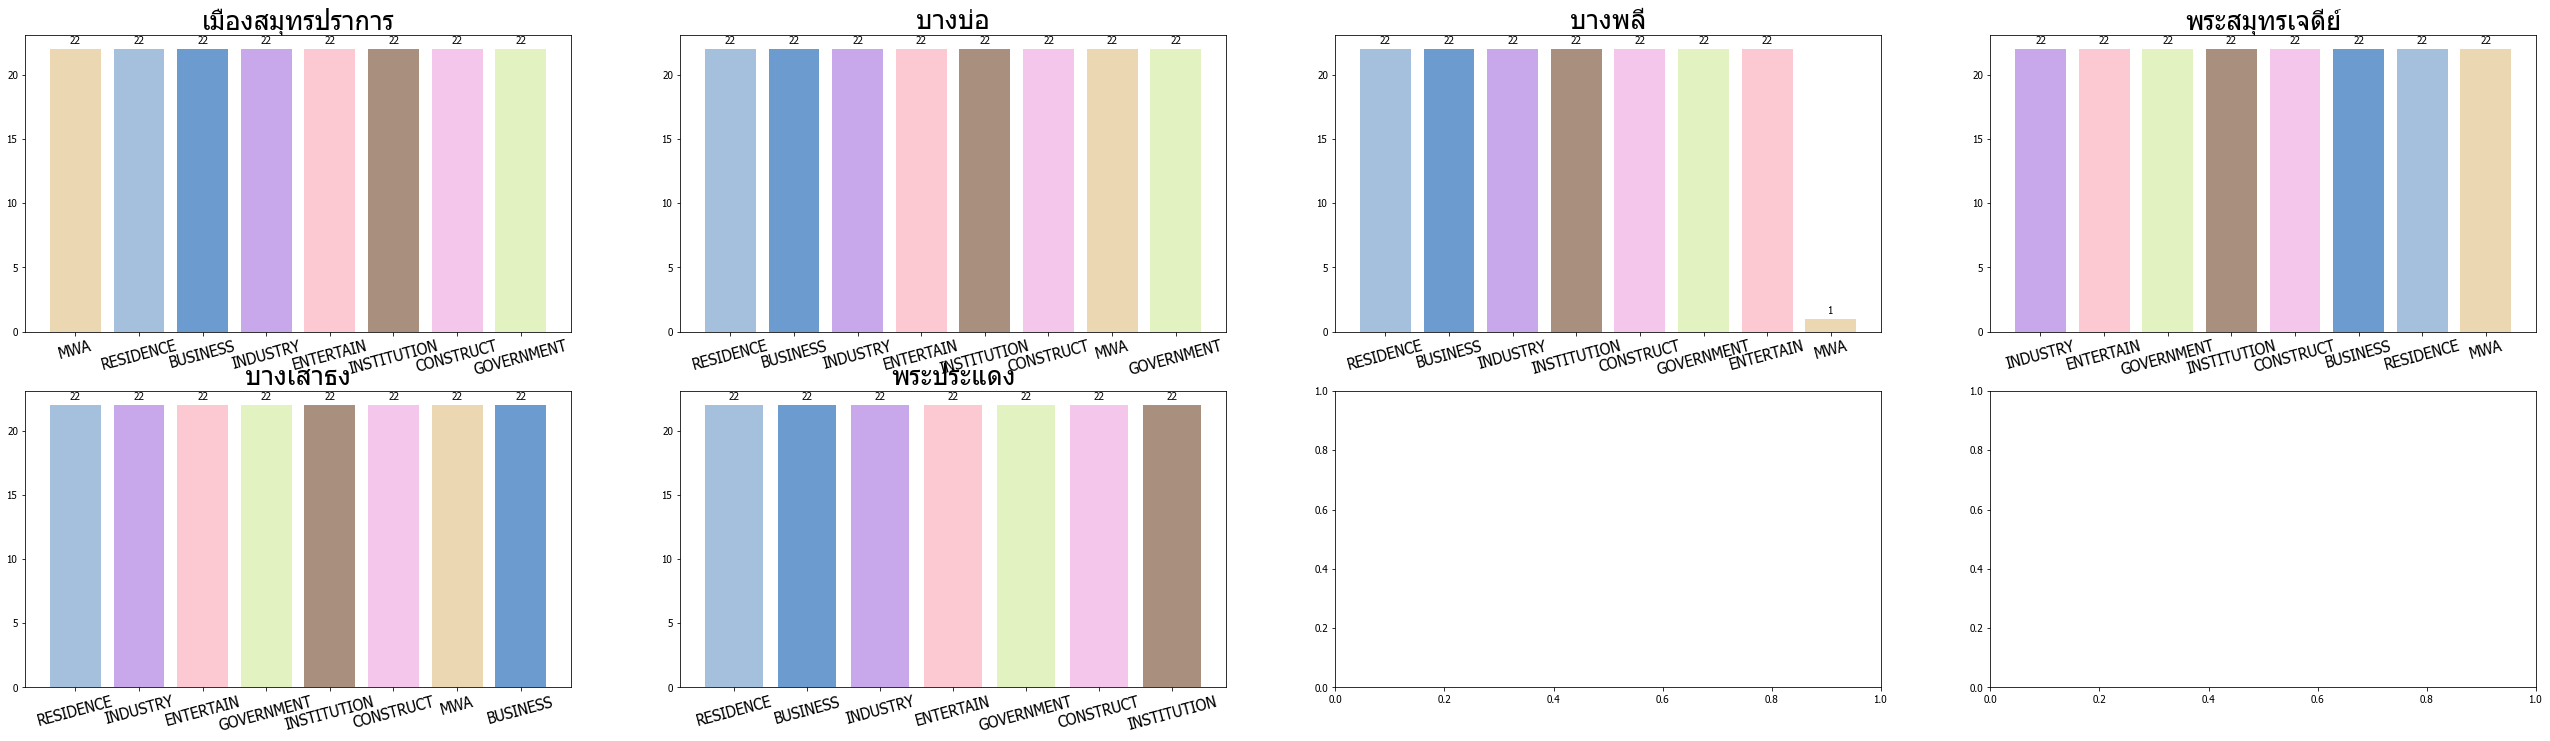

Province นนทบุรี
   1 : เมืองนนทบุรี
0 0 BUSINESS       22
INDUSTRY       22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
MWA            22
ENTERTAIN      22
RESIDENCE      22
Name: class_group_name, dtype: int64
   2 : บางกรวย
0 1 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
MWA            22
RESIDENCE      22
CONSTRUCT      22
Name: class_group_name, dtype: int64
   3 : บางใหญ่
0 2 INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
CONSTRUCT      22
MWA            22
RESIDENCE      22
BUSINESS       22
INSTITUTION    22
Name: class_group_name, dtype: int64
   4 : ไทรน้อย
0 3 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
RESIDENCE      22
INSTITUTION    22
CONSTRUCT      22
Name: class_group_name, dtype: int64
   5 : ปากเกร็ด
1 0 BUSINESS       22
INDUSTRY       22
ENTERTAIN      22
GOVERNMENT     22
INSTITUTION    22
RESIDENCE      22
CONSTRUCT      22
Name: class_group_name, dtype: int64
   6 : บางบัว

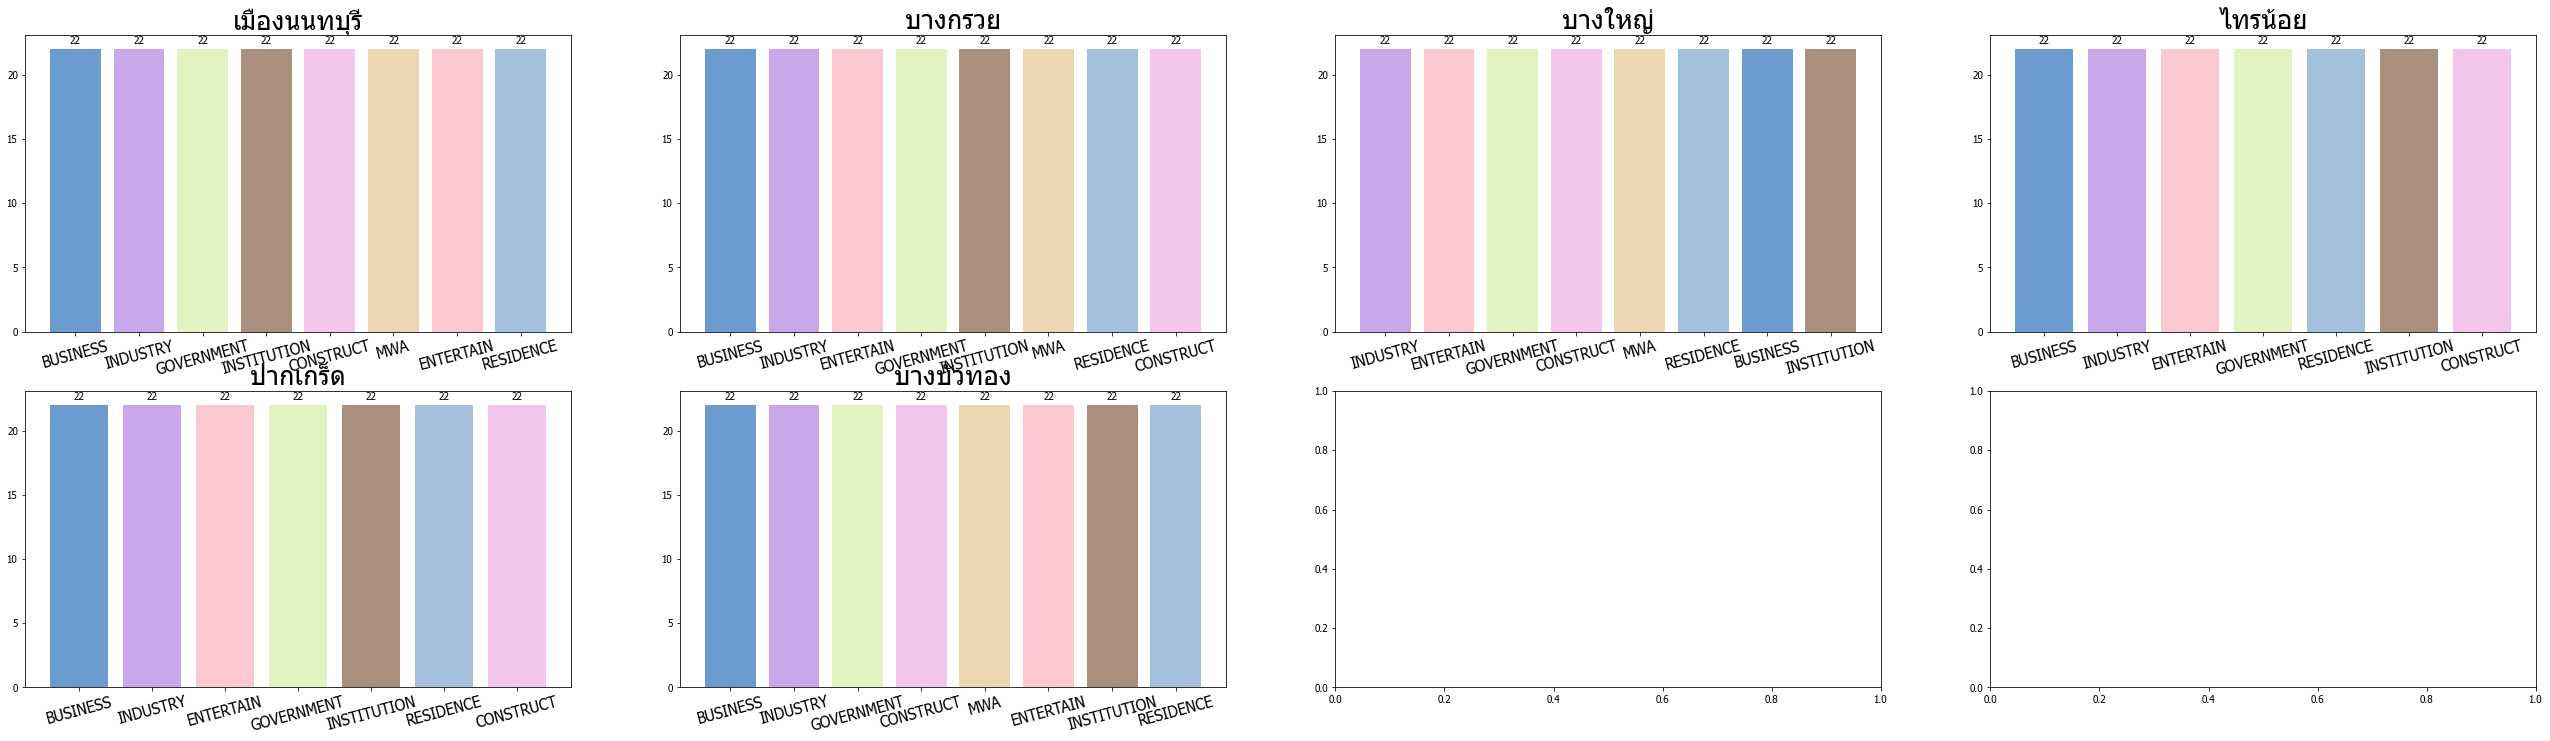

Province ปทุมธานี
   1 : ลำลูกกา
0 0 RESIDENCE      22
BUSINESS       22
GOVERNMENT     22
INSTITUTION    22
CONSTRUCT      22
Name: class_group_name, dtype: int64


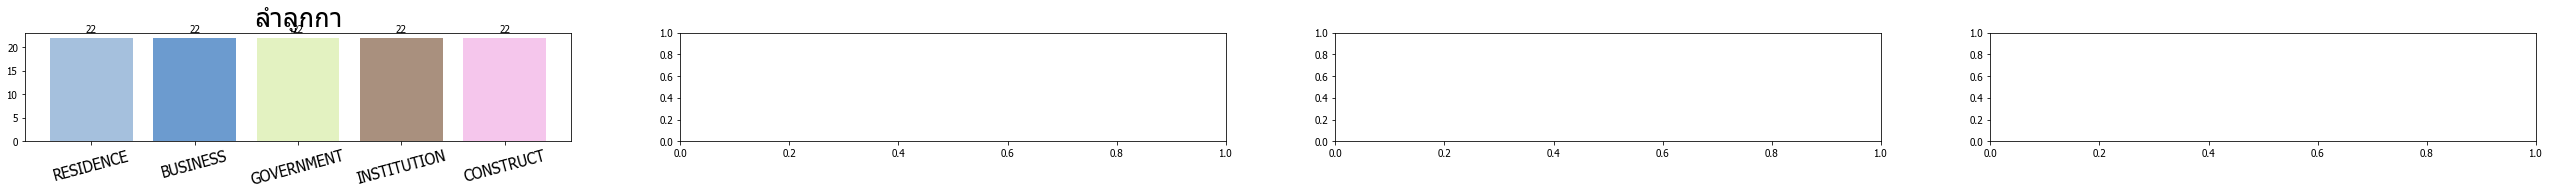

Province ฉะเชิงเทรา
   1 : บางปะกง
0 0 BUSINESS     22
CONSTRUCT    22
RESIDENCE    22
Name: class_group_name, dtype: int64


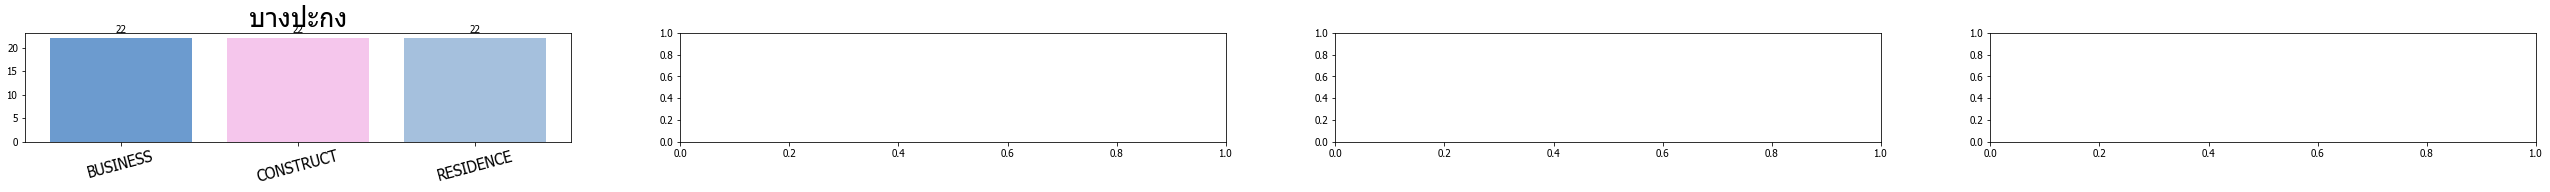

Province นครปฐม
   1 : พุทธมณฑล
0 0 RESIDENCE    22
Name: class_group_name, dtype: int64


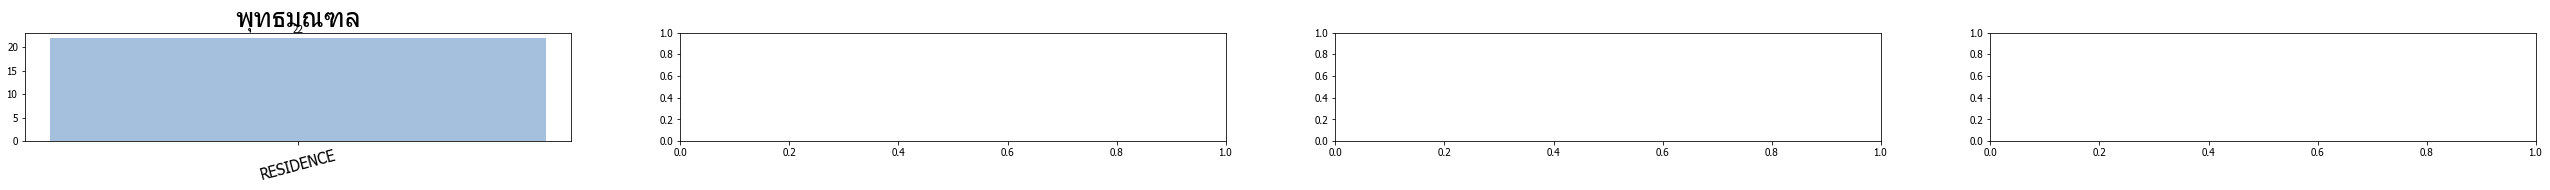

In [22]:
pv_name = cleaned_df['province_name'].unique()
col_per_row = 4
custom_colors = {
    'CONSTRUCT': '#F5C6EC',
    'INSTITUTION': '#A9907E',
    'ENTERTAIN': '#FCC8D1',
    'INDUSTRY': '#C9A7EB',
    'BUSINESS': '#6C9BCF',
    'RESIDENCE': '#A5C0DD',
    'MWA': '#EBD8B2',
    'GOVERNMENT': '#E3F2C1',
}
for p,pv in enumerate(pv_name):
    print("Province",pv)
    row=0
    ap_names = cleaned_df[cleaned_df['province_name']==pv]['amphur_name'].unique()
    ap_num = ap_names.shape[0]
    rows = math.ceil(ap_names.shape[0]/col_per_row)
    fig, ax = plt.subplots(rows,col_per_row,figsize=(45, ap_num*2))
    for a,ap in enumerate(ap_names):
        print("  ",a+1,":",ap)
        g_counts= cleaned_df[cleaned_df['amphur_name']==ap]['class_group_name'].value_counts()
        if a >= col_per_row-1 and a%col_per_row == 0:
            row+=1
        print(row,a%col_per_row,g_counts)
        
        # Calculate the current subplot index
        subplot_index = row * col_per_row + (a % col_per_row)

        # bars = ax[row,a%col_per_row].bar(g_counts.index,g_counts.values)
        # ax[row,a%col_per_row].set_title(ap)
        colors = [custom_colors[group] for group in g_counts.index]
        bars = ax.flat[subplot_index].bar(g_counts.index, g_counts.values, color=colors)
        ax.flat[subplot_index].set_title(ap, fontsize=26)
        for bar in bars:
            height = bar.get_height()
            # ax[row, a % col_per_row].annotate('{}'.format(height),
            ax.flat[subplot_index].annotate('{}'.format(height),
                                              xy=(bar.get_x() + bar.get_width() / 2, height),
                                              xytext=(0, 3),  # 3 points vertical offset
                                              textcoords="offset points",
                                              ha='center', va='bottom')
            
        ax.flat[subplot_index].tick_params(axis='x', labelrotation=15, labelsize=15)
    plt.show()
    # break

In [24]:
import seaborn as sns
sns.set(font="tahoma")

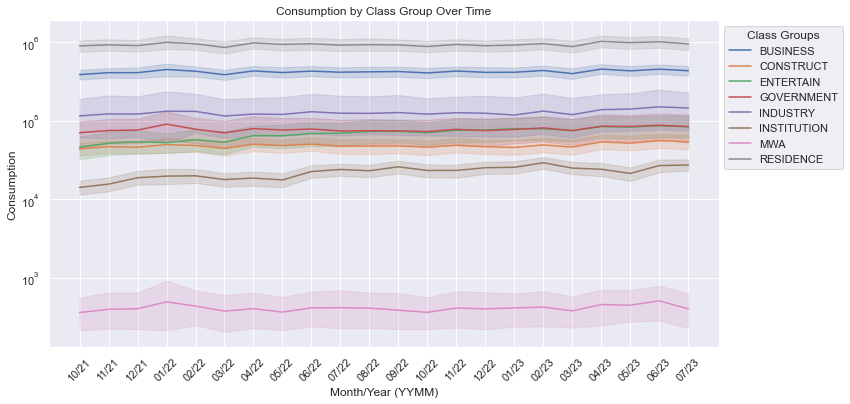

In [ ]:
plt.figure(figsize=(12, 6))
# Use a loop to create a line for each class_group_code
for class_group_code, data in cleaned_df.groupby('class_group_name'):
    sns.lineplot(data=data, x='YYMM', y='consumption', label=f'{class_group_code}')

plt.xlabel('Month/Year (YYMM)')
plt.ylabel('Consumption')
plt.yscale('log')
plt.title('Consumption by Class Group Over Time')
plt.legend(title='Class Groups', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)

plt.show()

Province กรุงเทพมหานคร
   1 : พระนคร
0 0
   2 : ดุสิต
0 1
   3 : หนองจอก
0 2
   4 : บางเขน
0 3
   5 : บางกะปิ
1 0
   6 : ปทุมวัน
1 1
   7 : ป้อมปราบศัตรูพ่าย
1 2
   8 : พระโขนง
1 3
   9 : มีนบุรี
2 0
   10 : ลาดกระบัง
2 1
   11 : ยานนาวา
2 2
   12 : สัมพันธวงศ์
2 3
   13 : พญาไท
3 0
   14 : ธนบุรี
3 1
   15 : บางกอกใหญ่
3 2
   16 : ห้วยขวาง
3 3
   17 : คลองสาน
4 0
   18 : ตลิ่งชัน
4 1
   19 : บางกอกน้อย
4 2
   20 : บางขุนเทียน
4 3
   21 : ภาษีเจริญ
5 0
   22 : หนองแขม
5 1
   23 : ราษฎร์บูรณะ
5 2
   24 : บางพลัด
5 3
   25 : ดินแดง
6 0
   26 : บึงกุ่ม
6 1
   27 : สาทร
6 2
   28 : บางซื่อ
6 3
   29 : จตุจักร
7 0
   30 : บางคอแหลม
7 1
   31 : ประเวศ
7 2
   32 : คลองเตย
7 3
   33 : สวนหลวง
8 0
   34 : จอมทอง
8 1
   35 : ดอนเมือง
8 2
   36 : ราชเทวี
8 3
   37 : ลาดพร้าว
9 0
   38 : วัฒนา
9 1
   39 : บางรัก
9 2
   40 : บางแค
9 3
   41 : หลักสี่
10 0
   42 : สายไหม
10 1
   43 : คันนายาว
10 2
   44 : สะพานสูง
10 3
   45 : วังทองหลาง
11 0
   46 : คลองสามวา
11 1
   47 : บางนา
11 2
   48 : ทวีวัฒน

c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3619 (\N{THAI CHARACTER RO RUA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3632 (\N{THAI CHARACTER SARA A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3588 (\N{THAI CHARACTER KHO KHWAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 

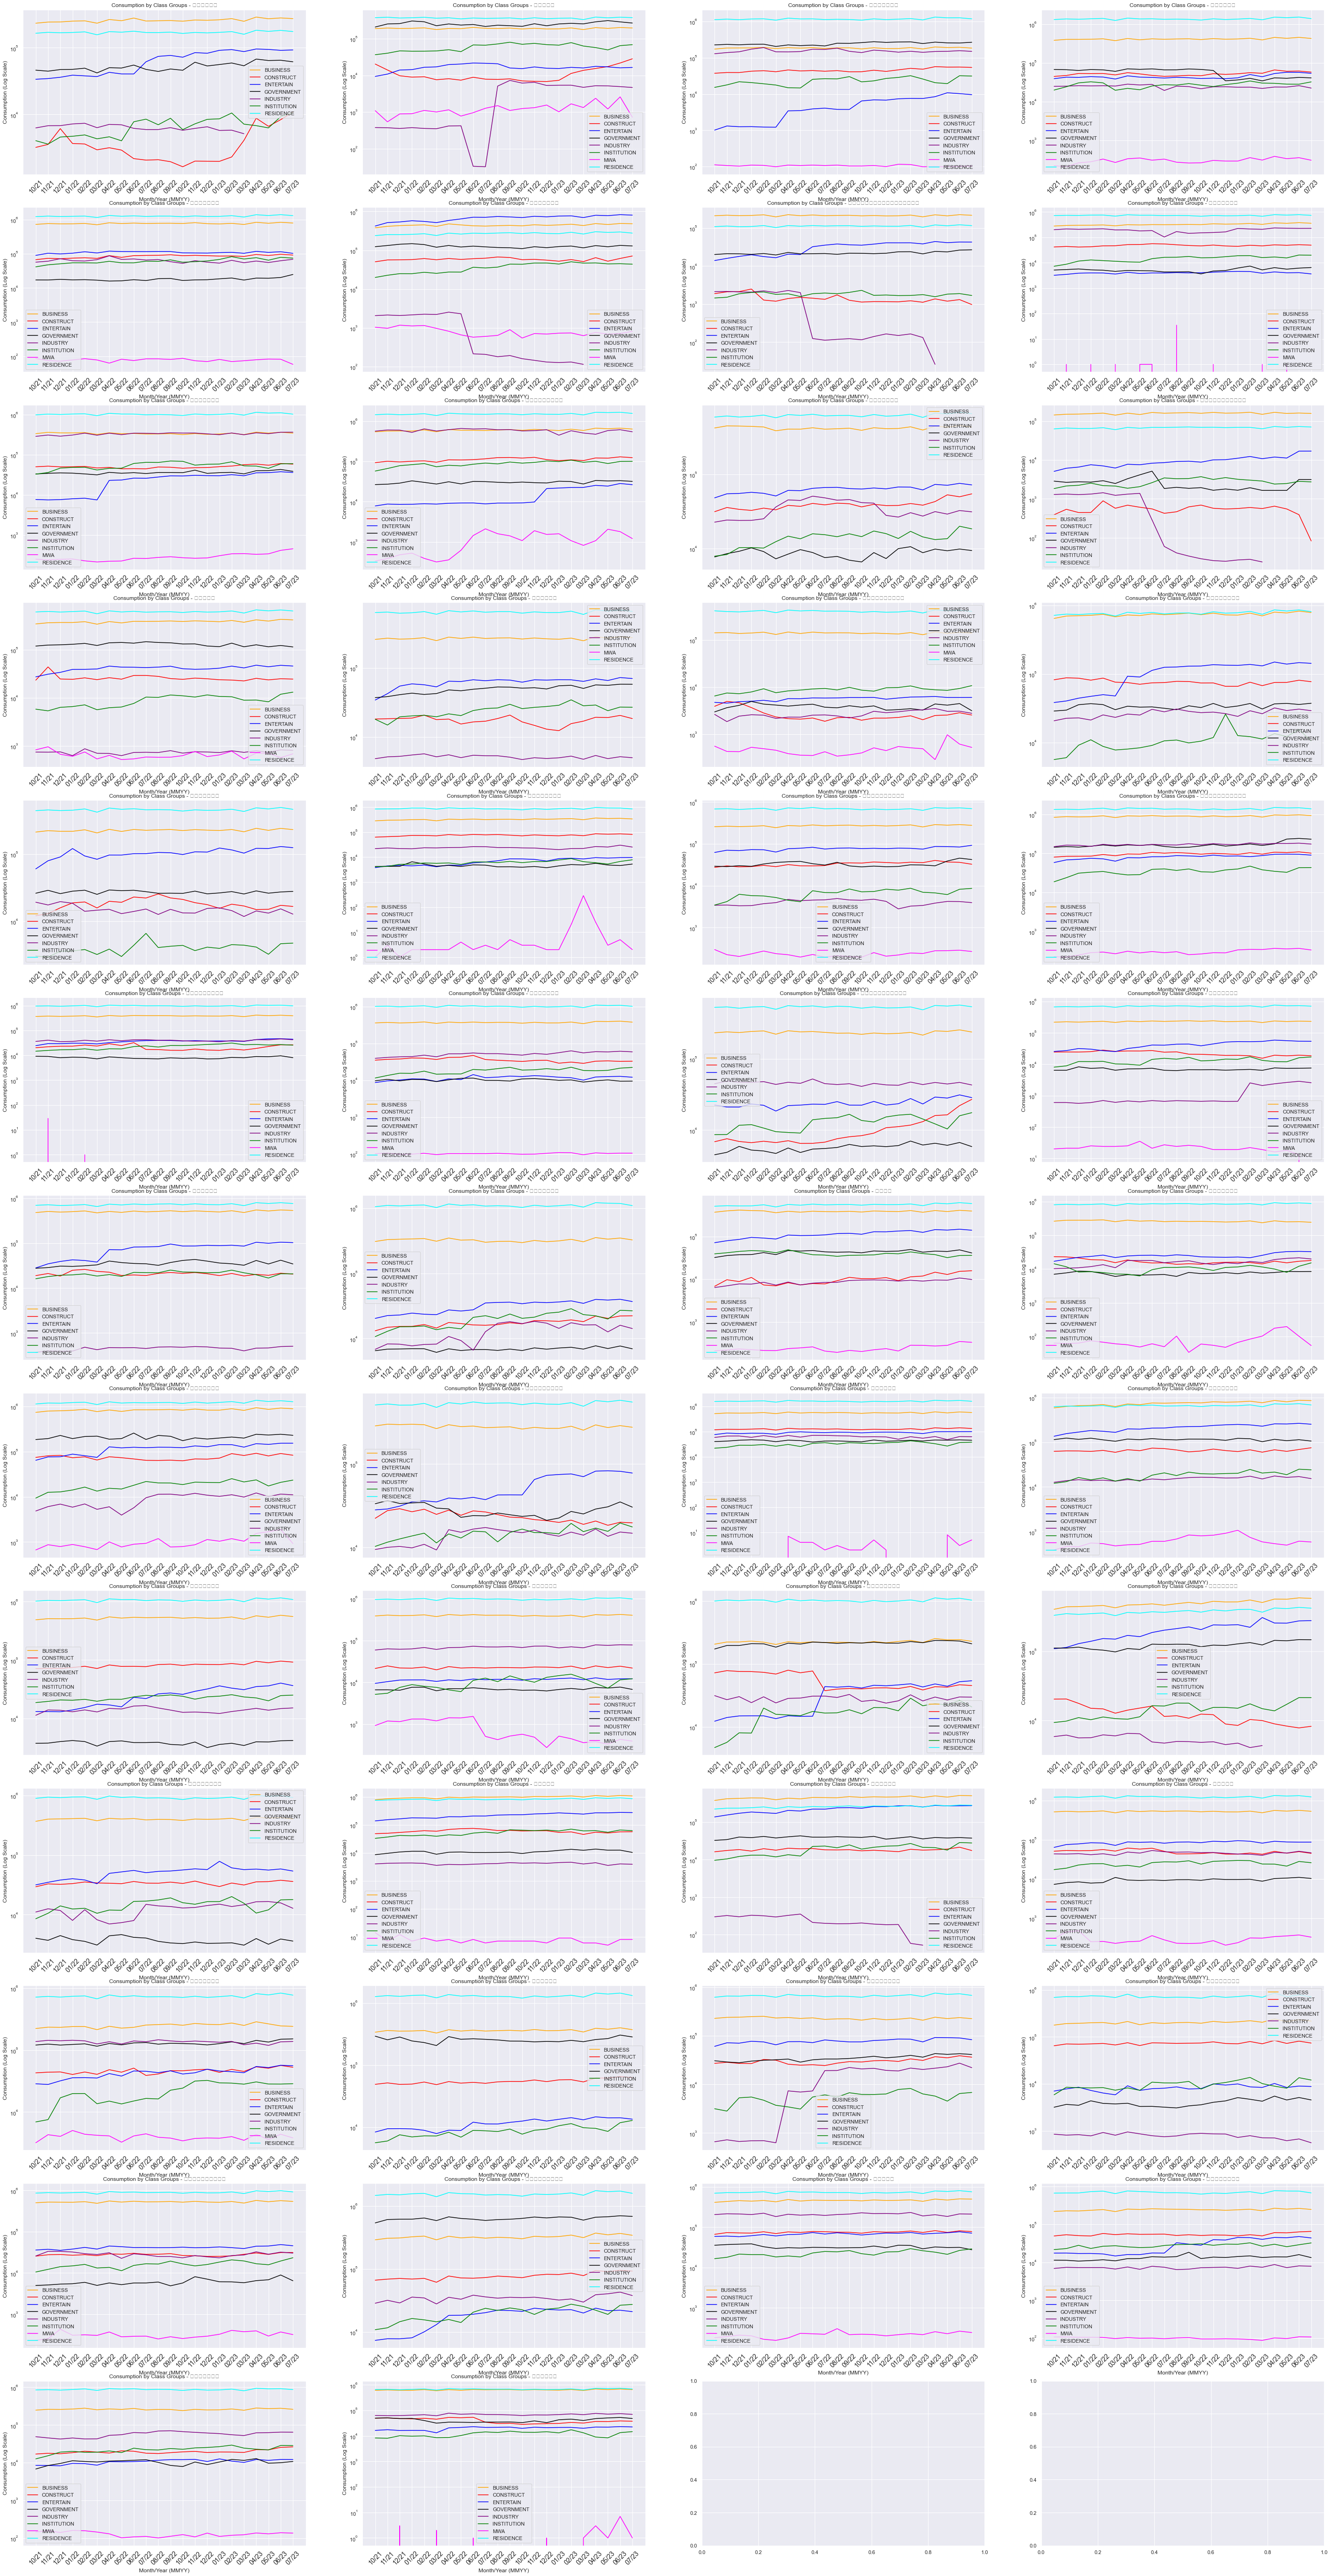

Province สมุทรปราการ
   1 : เมืองสมุทรปราการ
0 0
   2 : บางบ่อ
0 1
   3 : บางพลี
0 2
   4 : พระสมุทรเจดีย์
0 3
   5 : บางเสาธง
1 0
   6 : พระประแดง
1 1


c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3639 (\N{THAI CHARACTER SARA UEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 362

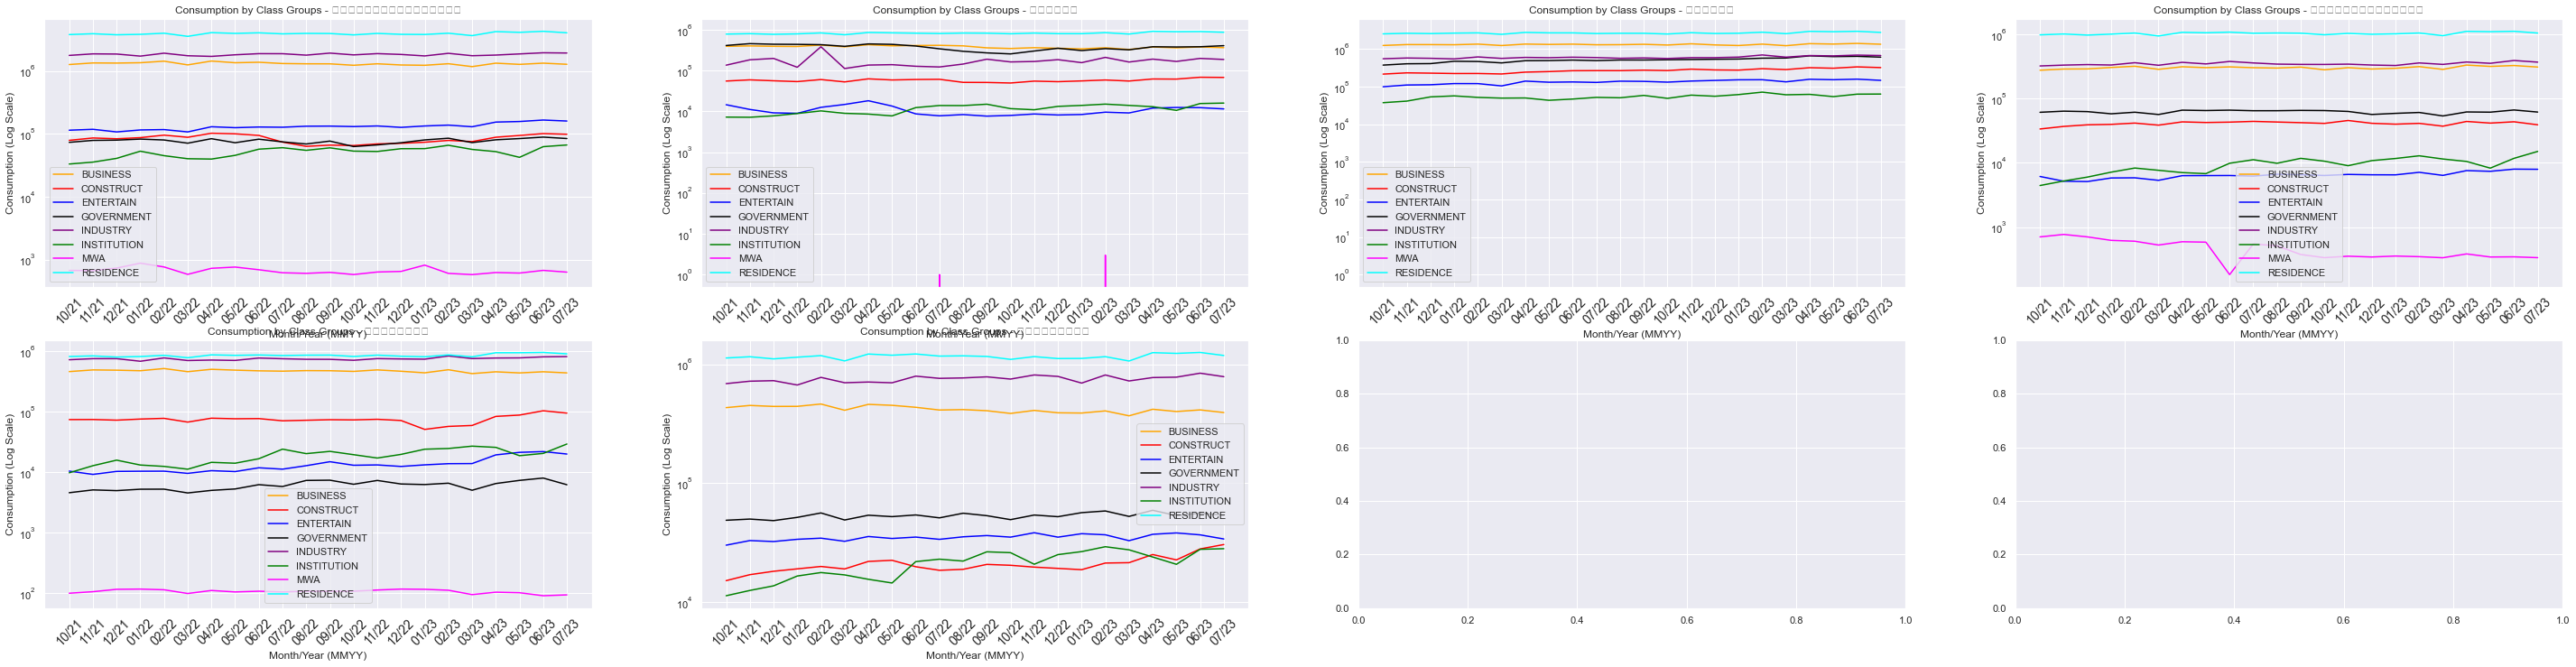

Province นนทบุรี
   1 : เมืองนนทบุรี
0 0
   2 : บางกรวย
0 1
   3 : บางใหญ่
0 2
   4 : ไทรน้อย
0 3
   5 : ปากเกร็ด
1 0
   6 : บางบัวทอง
1 1


c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3648 (\N{THAI CHARACTER SARA E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3639 (\N{THAI CHARACTER SARA UEE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3629 (\N{THAI CHARACTER O ANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3591 (\N{THAI CHARACTER NGO NGU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 360

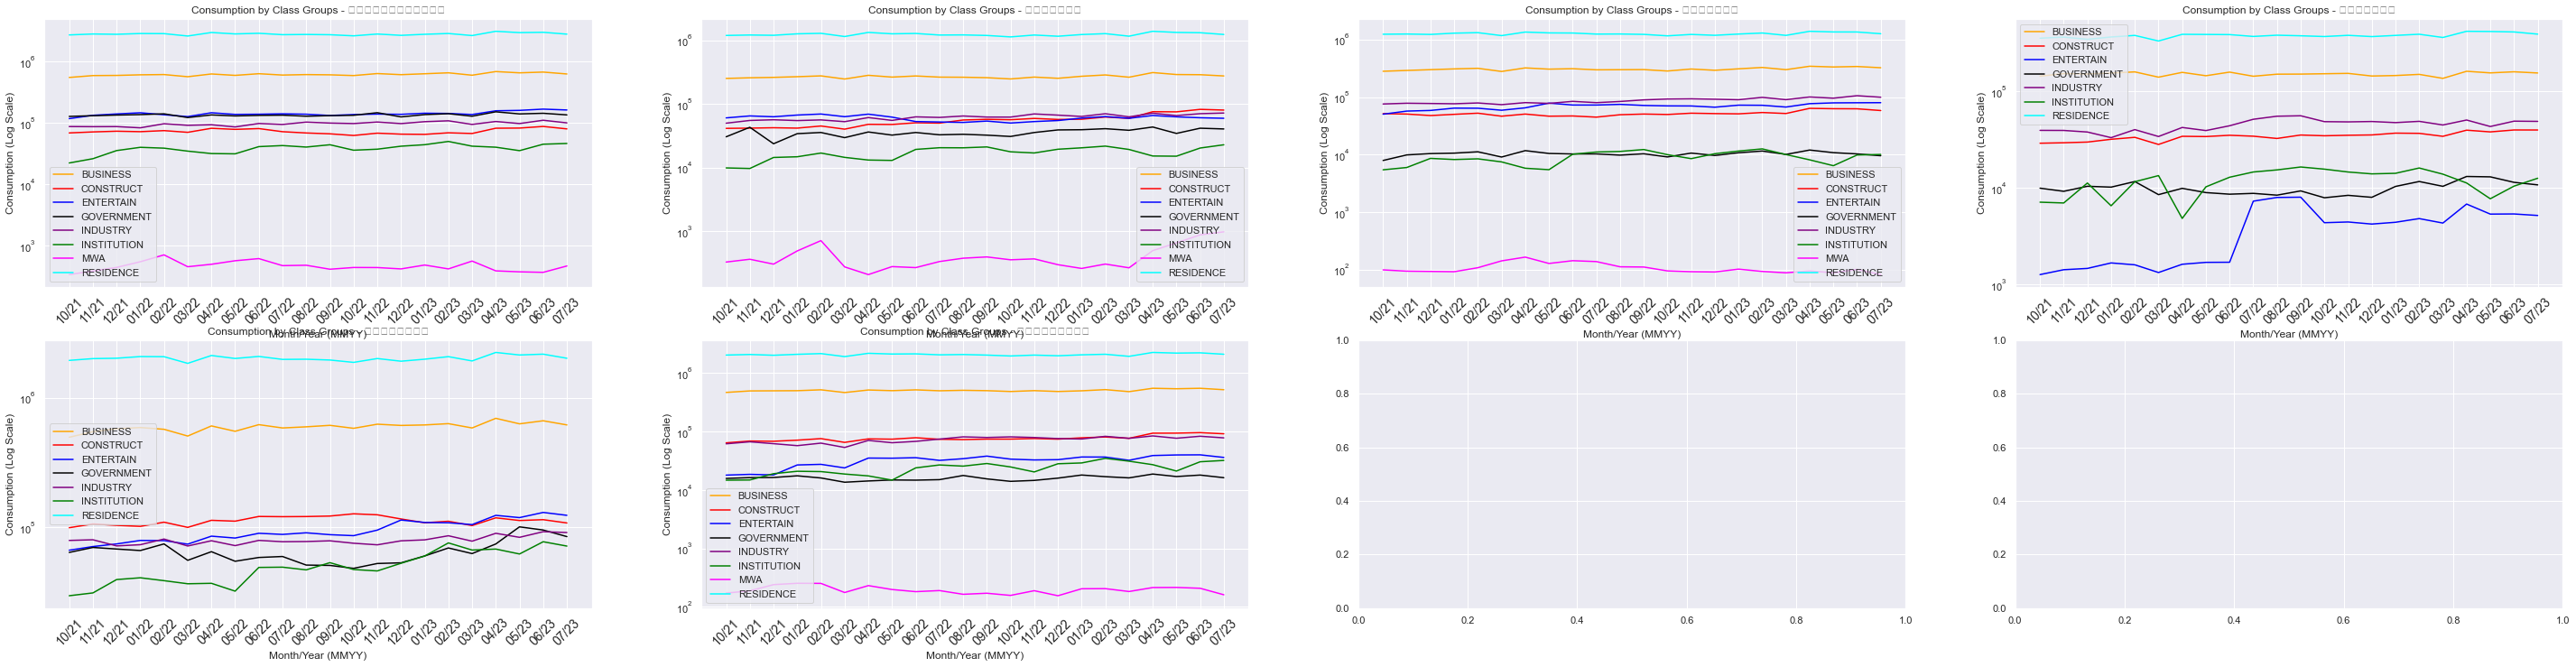

Province ปทุมธานี
   1 : ลำลูกกา
0 0


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

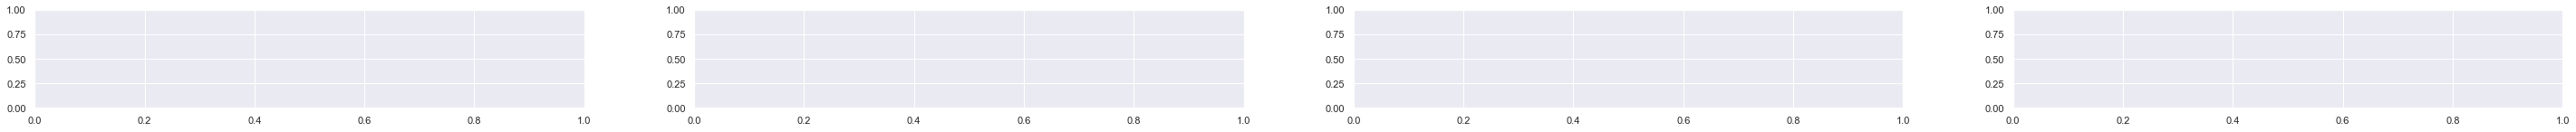

In [25]:
col_per_row = 4
class_group_colors = {
    'CONSTRUCT': 'red',
    'INSTITUTION': 'green',
    'ENTERTAIN': 'blue',
    'INDUSTRY': 'purple',
    'BUSINESS': 'orange',
    'RESIDENCE': 'cyan',
    'MWA': 'magenta',
    'GOVERNMENT': 'black',
}
sns.set(style="darkgrid")
for p,pv in enumerate(pv_name):
    print("Province",pv)
    row=0
    ap_names = cleaned_df[cleaned_df['province_name']==pv]['amphur_name'].unique()
    ap_num = ap_names.shape[0]
    rows = math.ceil(ap_names.shape[0]/col_per_row)
    fig, ax = plt.subplots(rows,col_per_row,figsize=(50, ap_num*2))
    for a,ap in enumerate(ap_names):
        print("  ",a+1,":",ap)
        if a >= col_per_row-1 and a%col_per_row == 0:
            row+=1
        print(row,a%col_per_row)

        for class_group_name, data in cleaned_df[(cleaned_df['province_name']==pv) & (cleaned_df['amphur_name']==ap)].groupby('class_group_name'):
            sns.lineplot(data=data, x='YYMM', y='consumption', label=f'{class_group_name}', ax=ax[row, a % col_per_row],color=class_group_colors.get(class_group_name, 'gray'))

        # Set labels and legend for line chart
        ax[row, a % col_per_row].set_xlabel('Month/Year (MMYY)')
        ax[row, a % col_per_row].set_ylabel('Consumption (Log Scale)')
        ax[row, a % col_per_row].set_yscale('log')
        ax[row, a % col_per_row].set_title(f'Consumption by Class Groups - {ap}')
        ax[row, a % col_per_row].tick_params(axis='x', labelrotation=45,labelsize=14)

    plt.show()

c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3608 (\N{THAI CHARACTER THO THONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Gl

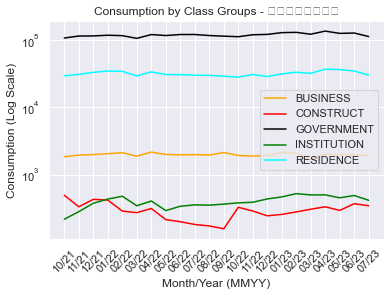

In [27]:
for class_group_name, data in cleaned_df[(cleaned_df['province_name']=='ปทุมธานี') & (cleaned_df['amphur_name']=='ลำลูกกา')].groupby('class_group_name'):
    sns.lineplot(data=data, x='YYMM', y='consumption', label=f'{class_group_name}',color=class_group_colors.get(class_group_name, 'gray'))

# Set labels and legend for line chart
plt.xlabel('Month/Year (MMYY)')
plt.ylabel('Consumption (Log Scale)')
plt.yscale('log')
plt.title(f'Consumption by Class Groups - {ap}')
plt.tick_params(axis='x', labelrotation=45)

plt.show()

c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3608 (\N{THAI CHARACTER THO THONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Gl

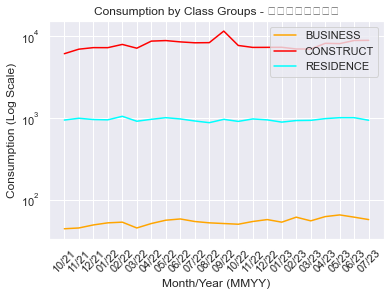

In [28]:
for class_group_name, data in cleaned_df[(cleaned_df['province_name']=='ฉะเชิงเทรา') & (cleaned_df['amphur_name']=='บางปะกง')].groupby('class_group_name'):
    sns.lineplot(data=data, x='YYMM', y='consumption', label=f'{class_group_name}',color=class_group_colors.get(class_group_name, 'gray'))

# Set labels and legend for line chart
plt.xlabel('Month/Year (MMYY)')
plt.ylabel('Consumption (Log Scale)')
plt.yscale('log')
plt.title(f'Consumption by Class Groups - {ap}')
plt.tick_params(axis='x', labelrotation=45)

plt.show()

c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3614 (\N{THAI CHARACTER PHO PHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3640 (\N{THAI CHARACTER SARA U}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3607 (\N{THAI CHARACTER THO THAHAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3608 (\N{THAI CHARACTER THO THONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 3617 (\N{THAI CHARACTER MO MA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Python38\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Gl

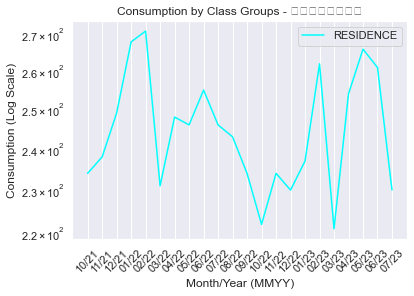

In [29]:
for class_group_name, data in cleaned_df[(cleaned_df['province_name']=='นครปฐม') & (cleaned_df['amphur_name']=='พุทธมณฑล')].groupby('class_group_name'):
    sns.lineplot(data=data, x='YYMM', y='consumption', label=f'{class_group_name}',color=class_group_colors.get(class_group_name, 'gray'))

# Set labels and legend for line chart
plt.xlabel('Month/Year (MMYY)')
plt.ylabel('Consumption (Log Scale)')
plt.yscale('log')
plt.title(f'Consumption by Class Groups - {ap}')
plt.tick_params(axis='x', labelrotation=45)

plt.show()

In [25]:
pv_names = cleaned_df['province_name'].unique()
dataset = {}
i=0
for p, pv in enumerate(pv_names):
    dataset[pv] = {}
    ap_names = cleaned_df[cleaned_df['province_name'] == pv]['amphur_name'].unique()
    for a, ap in enumerate(ap_names):
        dataset[pv][ap] = {}
        cs_names = cleaned_df[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap)]['class_group_name'].unique()
        for c, cs in enumerate(cs_names):
            # sub_data = cleaned_df.loc[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap) & (cleaned_df['class_group_name'] == cs)]
            # dataset[pv][ap][cs] = sub_data[['consumption']].copy().reset_index(drop=True)
            # dataset.rename(columns = {'consumption': 'x'}, inplace = True)
            # dataset['y'] = dataset['x'].copy().shift(-1)
            # dataset = dataset[:-1]
            # dataset
            sub_data = cleaned_df[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap) & (cleaned_df['class_group_name'] == cs)]
            if sub_data.shape[0] != 0:
                i+=1
                dataset[pv][ap][cs] = sub_data[['consumption']].copy().reset_index(drop=True)
                dataset[pv][ap][cs].rename(columns={'consumption': 'x'}, inplace=True)
                dataset[pv][ap][cs]['y'] = dataset[pv][ap][cs]['x'].shift(-1)
                dataset[pv][ap][cs] = dataset[pv][ap][cs][:-1]
            print(f'{i}:::{pv}-{ap}-{cs}--samples:{sub_data.shape[0]}')

1:::กรุงเทพมหานคร-พระนคร-ENTERTAIN--samples:22
2:::กรุงเทพมหานคร-พระนคร-GOVERNMENT--samples:22
3:::กรุงเทพมหานคร-พระนคร-INSTITUTION--samples:22
4:::กรุงเทพมหานคร-พระนคร-CONSTRUCT--samples:22
5:::กรุงเทพมหานคร-พระนคร-BUSINESS--samples:22
6:::กรุงเทพมหานคร-พระนคร-RESIDENCE--samples:22
7:::กรุงเทพมหานคร-พระนคร-INDUSTRY--samples:18
8:::กรุงเทพมหานคร-ดุสิต-BUSINESS--samples:22
9:::กรุงเทพมหานคร-ดุสิต-INDUSTRY--samples:22
10:::กรุงเทพมหานคร-ดุสิต-ENTERTAIN--samples:22
11:::กรุงเทพมหานคร-ดุสิต-GOVERNMENT--samples:22
12:::กรุงเทพมหานคร-ดุสิต-INSTITUTION--samples:22
13:::กรุงเทพมหานคร-ดุสิต-MWA--samples:22
14:::กรุงเทพมหานคร-ดุสิต-CONSTRUCT--samples:22
15:::กรุงเทพมหานคร-ดุสิต-RESIDENCE--samples:22
16:::กรุงเทพมหานคร-หนองจอก-BUSINESS--samples:22
17:::กรุงเทพมหานคร-หนองจอก-INDUSTRY--samples:22
18:::กรุงเทพมหานคร-หนองจอก-ENTERTAIN--samples:22
19:::กรุงเทพมหานคร-หนองจอก-GOVERNMENT--samples:22
20:::กรุงเทพมหานคร-หนองจอก-INSTITUTION--samples:22
21:::กรุงเทพมหานคร-หนองจอก-CONSTRUCT--samples:22
22:::ก

In [26]:
dataset['กรุงเทพมหานคร']['พระนคร']

{'ENTERTAIN':         x        y
 0   33640  34443.0
 1   34443  36021.0
 2   36021  38717.0
 3   38717  37815.0
 4   37815  36878.0
 5   36878  42709.0
 6   42709  40410.0
 7   40410  40383.0
 8   40383  61408.0
 9   61408  74049.0
 10  74049  76512.0
 11  76512  71904.0
 12  71904  84248.0
 13  84248  82522.0
 14  82522  91233.0
 15  91233  93540.0
 16  93540  87298.0
 17  87298  95522.0
 18  95522  94092.0
 19  94092  91187.0
 20  91187  92406.0,
 'GOVERNMENT':         x        y
 0   46032  44461.0
 1   44461  47007.0
 2   47007  47321.0
 3   47321  49274.0
 4   49274  41860.0
 5   41860  50095.0
 6   50095  49555.0
 7   49555  54866.0
 8   54866  47259.0
 9   47259  44045.0
 10  44045  47912.0
 11  47912  45856.0
 12  45856  60557.0
 13  60557  53187.0
 14  53187  55900.0
 15  55900  58927.0
 16  58927  53537.0
 17  53537  67470.0
 18  67470  64198.0
 19  64198  64787.0
 20  64787  61402.0,
 'INSTITUTION':         x        y
 0    4042   3592.0
 1    3592   4587.0
 2    4587   470

In [27]:
pv_names = cleaned_df['province_name'].unique()
dataset_lag = {}
lag_range = 3
i=0
for p, pv in enumerate(pv_names):
    dataset_lag[pv] = {}
    ap_names = cleaned_df[cleaned_df['province_name'] == pv]['amphur_name'].unique()
    for a, ap in enumerate(ap_names):
        dataset_lag[pv][ap] = {}
        cs_names = cleaned_df[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap)]['class_group_name'].unique()
        for c, cs in enumerate(cs_names):
            # sub_data = cleaned_df.loc[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap) & (cleaned_df['class_group_name'] == cs)]
            # dataset[pv][ap][cs] = sub_data[['consumption']].copy().reset_index(drop=True)
            # dataset.rename(columns = {'consumption': 'x'}, inplace = True)
            # dataset['y'] = dataset['x'].copy().shift(-1)
            # dataset = dataset[:-1]
            # dataset
            sub_data = cleaned_df[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap) & (cleaned_df['class_group_name'] == cs)]
            if sub_data.shape[0] != 0:
                i+=1
                # LAG DATASET
                dataset_lag[pv][ap][cs] = sub_data[['consumption']].copy().reset_index(drop=True)
                dataset_lag[pv][ap][cs].rename(columns={'consumption': 'x'}, inplace=True)
                for l in range(lag_range):
                    dataset_lag[pv][ap][cs]['x'+str(l)] = dataset_lag[pv][ap][cs]['x'].copy().shift(-l)
                dataset_lag[pv][ap][cs]['y'] = dataset_lag[pv][ap][cs]['x'].copy().shift(-(lag_range))
                dataset_lag[pv][ap][cs] = dataset_lag[pv][ap][cs][:-lag_range]
                dataset_lag[pv][ap][cs] = dataset_lag[pv][ap][cs].drop(columns='x')
            print(f'{i}:::{pv}-{ap}-{cs}--samples:{sub_data.shape[0]}')

1:::กรุงเทพมหานคร-พระนคร-ENTERTAIN--samples:22
2:::กรุงเทพมหานคร-พระนคร-GOVERNMENT--samples:22
3:::กรุงเทพมหานคร-พระนคร-INSTITUTION--samples:22
4:::กรุงเทพมหานคร-พระนคร-CONSTRUCT--samples:22
5:::กรุงเทพมหานคร-พระนคร-BUSINESS--samples:22
6:::กรุงเทพมหานคร-พระนคร-RESIDENCE--samples:22
7:::กรุงเทพมหานคร-พระนคร-INDUSTRY--samples:18
8:::กรุงเทพมหานคร-ดุสิต-BUSINESS--samples:22
9:::กรุงเทพมหานคร-ดุสิต-INDUSTRY--samples:22
10:::กรุงเทพมหานคร-ดุสิต-ENTERTAIN--samples:22
11:::กรุงเทพมหานคร-ดุสิต-GOVERNMENT--samples:22
12:::กรุงเทพมหานคร-ดุสิต-INSTITUTION--samples:22
13:::กรุงเทพมหานคร-ดุสิต-MWA--samples:22
14:::กรุงเทพมหานคร-ดุสิต-CONSTRUCT--samples:22
15:::กรุงเทพมหานคร-ดุสิต-RESIDENCE--samples:22
16:::กรุงเทพมหานคร-หนองจอก-BUSINESS--samples:22
17:::กรุงเทพมหานคร-หนองจอก-INDUSTRY--samples:22
18:::กรุงเทพมหานคร-หนองจอก-ENTERTAIN--samples:22
19:::กรุงเทพมหานคร-หนองจอก-GOVERNMENT--samples:22
20:::กรุงเทพมหานคร-หนองจอก-INSTITUTION--samples:22
21:::กรุงเทพมหานคร-หนองจอก-CONSTRUCT--samples:22
22:::ก

In [28]:
dataset['กรุงเทพมหานคร']['พระนคร']['RESIDENCE']

x         y
0   164415  169733.0
1   169733  167071.0
2   167071  168906.0
3   168906  172480.0
4   172480  155949.0
5   155949  173775.0
6   173775  170614.0
7   170614  176461.0
8   176461  168600.0
9   168600  168277.0
10  168277  170881.0
11  170881  163303.0
12  163303  169114.0
13  169114  166455.0
14  166455  169580.0
15  169580  173883.0
16  173883  158743.0
17  158743  182400.0
18  182400  175517.0
19  175517  181398.0
20  181398  174328.0

In [31]:
dataset_lag['กรุงเทพมหานคร']['พระนคร']['RESIDENCE']

x0        x1        x2         y
0   164415  169733.0  167071.0  168906.0
1   169733  167071.0  168906.0  172480.0
2   167071  168906.0  172480.0  155949.0
3   168906  172480.0  155949.0  173775.0
4   172480  155949.0  173775.0  170614.0
5   155949  173775.0  170614.0  176461.0
6   173775  170614.0  176461.0  168600.0
7   170614  176461.0  168600.0  168277.0
8   176461  168600.0  168277.0  170881.0
9   168600  168277.0  170881.0  163303.0
10  168277  170881.0  163303.0  169114.0
11  170881  163303.0  169114.0  166455.0
12  163303  169114.0  166455.0  169580.0
13  169114  166455.0  169580.0  173883.0
14  166455  169580.0  173883.0  158743.0
15  169580  173883.0  158743.0  182400.0
16  173883  158743.0  182400.0  175517.0
17  158743  182400.0  175517.0  181398.0
18  182400  175517.0  181398.0  174328.0

Linear regression 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract the features (x0, x1, x2) and target variable (y)
X = dataset_lag['กรุงเทพมหานคร']['พระนคร']['RESIDENCE'][['x0', 'x1', 'x2']]
y = dataset_lag['กรุงเทพมหานคร']['พระนคร']['RESIDENCE']['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 19334377.203321118
R-squared: -0.35603756799688346


Auto ML

In [38]:
import h2o
from h2o.automl import H2OAutoML

# Initialize H2O
h2o.init()

# Convert your DataFrame to an H2OFrame
h2o_df = h2o.H2OFrame(dataset_lag['กรุงเทพมหานคร']['พระนคร']['RESIDENCE'])

# Specify the features and target variable
x = ['x0', 'x1', 'x2']
y = 'y'

# Split the data into training and test sets
train, test = h2o_df.split_frame(ratios=[0.8], seed=123)

# Initialize and train the AutoML model
aml = H2OAutoML(max_models=10, seed=123)
aml.train(x=x, y=y, training_frame=train)

# Get the best model from AutoML
best_model = aml.leader

# Make predictions on the test set
predictions = best_model.predict(test)

# Evaluate the model's performance
aml.leaderboard

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  -------------------------------
H2O_cluster_uptime:         32 secs
H2O_cluster_timezone:       Asia/Bangkok
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.42.0.3
H2O_cluster_version_age:    12 days
H2O_cluster_name:           H2O_from_python_siripatt_r41924
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    4.000 Gb
H2O_cluster_total_cores:    8
H2O_cluster_allowed_cores:  8
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://localhost:54321
H2O_connection_proxy:       {"http": null, "https": null}
H2O_internal_security:      False
Python_version:             3.8.10 final
--------------------------  -------------------------------

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
15:25:34.683: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 16.0.

█
15:25:35.380: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 16.0.
15:25:35.382: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 16.0.
15:25:35.383: _min_rows param, The dataset size is too small to split for min_rows=10.0: must have at least 20.0 (weighted) rows, but have only 16.0.

██████████████████████████████████████████████████████████████| (done) 100%

15:25:39.310: StackedEnsemble_BestOfFamily_1_AutoML_1_20230904_152533 [StackedEnsemble best_of_family_xglm (built with AUTO metalearner, using top model from each algorithm type)] failed: java.lang.Runti

model_id                                                  rmse          mse       mae      rmsle    mean_residual_deviance
----------------------------------------------------  --------  -----------  --------  ---------  ------------------------
DRF_1_AutoML_1_20230904_152533                         5995.82  3.59499e+07   4830.42  0.0354028               3.59499e+07
XGBoost_grid_1_AutoML_1_20230904_152533_model_1        6106.94  3.72947e+07   4586.43  0.0360051               3.72947e+07
GLM_1_AutoML_1_20230904_152533                         6107.02  3.72956e+07   4586.48  0.0360056               3.72956e+07
XGBoost_2_AutoML_1_20230904_152533                     6110.21  3.73346e+07   4694.04  0.0359876               3.73346e+07
GBM_5_AutoML_1_20230904_152533                         6423.64  4.12631e+07   5245.48  0.0377827               4.12631e+07
XRT_1_AutoML_1_20230904_152533                         6539.42  4.27641e+07   5329.45  0.0385124               4.27641e+07
DeepLearning_grid_1_AutoML_1_20230904_152533_model_1   6754.78  4.5627e+07    5213.55  0.0396805               4.5627e+07
XGBoost_3_AutoML_1_20230904_152533                     7356     5.41107e+07   6254.5   0.043658                5.41107e+07
DeepLearning_1_AutoML_1_20230904_152533                8822.35  7.78338e+07   7213.49  0.0519749               7.78338e+07
XGBoost_1_AutoML_1_20230904_152533                    14393.4   2.0717e+08   10294.5   0.0895049               2.0717e+08
[10 rows x 6 columns]

In [ ]:
h2o.init()
h2o_df = h2o.H2OFrame(dataset_lag['กรุงเทพมหานคร']['พระนคร']['RESIDENCE'])
x = ['x0', 'x1', 'x2']
y = 'y'
train, test = h2o_df.split_frame(ratios=[0.8], seed=123)
aml = H2OAutoML(max_models=10, seed=123)
aml.train(x=x, y=y, training_frame=train)
best_model = aml.leader
predictions = best_model.predict(test)
aml.leaderboard

In [44]:
dataset_lag['กรุงเทพมหานคร']['พระนคร'].keys()

dict_keys(['ENTERTAIN', 'GOVERNMENT', 'INSTITUTION', 'CONSTRUCT', 'BUSINESS', 'RESIDENCE', 'INDUSTRY'])

In [ ]:
pv_keys = dataset_lag.keys()
for p, pv in enumerate(pv_keys):
    ap_keys = dataset_lag[pv].keys()
    for a, ap in enumerate(ap_keys):
        cs_names = dataset_lag[pv][ap].keys()
        for c, cs in enumerate(cs_names):
            dataset_lag[pv][ap][cs]
            
            h2o.init()
            h2o_df = h2o.H2OFrame(dataset_lag['กรุงเทพมหานคร']['พระนคร']['RESIDENCE'])
            x = ['x0', 'x1', 'x2']
            y = 'y'
            train, test = h2o_df.split_frame(ratios=[0.8], seed=123)
            aml = H2OAutoML(max_models=10, seed=123)
            aml.train(x=x, y=y, training_frame=train)
            best_model = aml.leader
            predictions = best_model.predict(test)
            aml.leaderboard
        print(f'{i}:::{pv}-{ap}-{cs}--samples:{sub_data.shape[0]}')